In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

2024-04-01 21:31:21.741760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import load_model

model = load_model('./models/model_X3.keras')

TypeError: Could not locate function 'dice_loss'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'dice_loss', 'registered_name': 'function'}

In [ ]:
input_shape = (256, 256, 3)

def predict_image(model, image_path):
    image = Image.open(image_path).convert('RGB').resize(input_shape[:2])
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    mask = model.predict(image_array)
    return mask

image_path = './images_val/frankfurt_000001_031416.png'
predicted_mask = predict_image(model, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


In [ ]:
predicted_mask.shape

(1, 256, 256, 8)

In [ ]:
mask1 = predicted_mask[0].copy()

In [ ]:
segmentation_map = np.argmax(mask1, axis=-1)

In [ ]:
segmentation_map

array([[1, 1, 1, ..., 1, 1, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [3, 1, 1, ..., 1, 1, 1],
       [3, 1, 1, ..., 1, 1, 1]])

In [ ]:
segmentation_map.shape

(256, 256)

In [ ]:
tableau_transforme = np.expand_dims(segmentation_map, axis=-1)
print(tableau_transforme.shape)

(256, 256, 1)


In [ ]:
first_mask_array = np.uint8(tableau_transforme)
transformed_array = np.repeat(first_mask_array, 3, axis=2)
print(transformed_array.shape)

(256, 256, 3)


In [ ]:
for x in range(transformed_array.shape[0]):
    for y in range(transformed_array.shape[1]):
        if (transformed_array[x, y] == [0, 0, 0]).all():
            transformed_array[x, y] = [250, 170, 30]
        elif (transformed_array[x, y] == [1, 1, 1]).all():
            transformed_array[x, y] = [0, 0, 142]
        elif (transformed_array[x, y] == [2, 2, 2]).all():
            transformed_array[x, y] = [102, 102, 156]
        elif (transformed_array[x, y] == [3, 3, 3]).all():
            transformed_array[x, y] = [220, 20, 60]
        elif (transformed_array[x, y] == [4, 4, 4]).all():
            transformed_array[x, y] = [153, 153, 153]
        elif (transformed_array[x, y] == [5, 5, 5]).all():
            transformed_array[x, y] = [244, 35, 232]
        elif (transformed_array[x, y] == [6, 6, 6]).all():
            transformed_array[x, y] = [70, 70, 70]
        elif (transformed_array[x, y] == [7, 7, 7]).all():
            transformed_array[x, y] = [70, 130, 180]

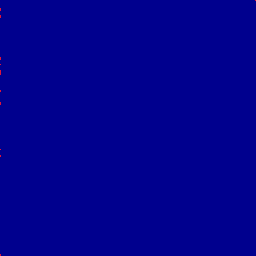

In [ ]:
pil_mask = Image.fromarray(transformed_array)
pil_mask

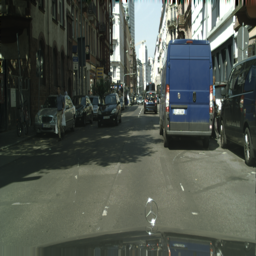

In [ ]:
img1 = Image.open(image_path).convert('RGB').resize(input_shape[:2])
img1